# Trading
## Report - 1 day


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener todas las importaciones necesarias para tus funciones personalizadas
from technical_analysis.indicators import calculate_rsi, calculate_sma, calculate_bollinger, calculate_volume_oscillator
from technical_analysis.get_strategies import get_strategies
from technical_analysis.backtest import backtest
from technical_analysis.generate_buy_signals import generate_buy_signals
from technical_analysis.generate_sell_signals import generate_sell_signals
from technical_analysis.set_params import set_params
from technical_analysis.optimize import optimize


In [13]:
# Cargar conjunto de datos
data_1d = pd.read_csv("data/aapl_1d_train.csv")


In [14]:
# Calcula los indicadores para el conjunto de datos
data_1d['RSI'] = calculate_rsi(data_1d, window=14)
data_1d['SMA'] = calculate_sma(data_1d['Close'], window=50)
data_1d['BB_mavg'], data_1d['BB_hband'], data_1d['BB_lband'] = calculate_bollinger(data_1d, 20, 2)
data_1d['Volume_Osc'] = calculate_volume_oscillator(data_1d, 5, 20)


In [15]:
strategies = get_strategies()
# Genera señales de compra y venta para las estrategias
buy_signals = generate_buy_signals(data_1d, strategies)
sell_signals = generate_sell_signals(data_1d, strategies)

In [16]:
# Realiza el backtesting para cada estrategia y guarda los resultados
backtest_results = backtest(data_1d, buy_signals, sell_signals, initial_cash=10000, commission_per_trade=0.001, shares_to_operate=10, stop_loss=0.01, take_profit=0.01)


In [17]:
# Realizar la optimización
study = optimize(data_1d, n_trials=100)


[I 2024-02-25 23:03:51,160] A new study created in memory with name: no-name-1ffbf5dd-3caa-4d2d-97a3-fc579f3db2ce
[I 2024-02-25 23:03:51,745] Trial 0 finished with value: -0.0015696109000008437 and parameters: {'short_window': 36, 'long_window': 59, 'rsi_period': 19, 'bb_window': 37, 'bb_std': 1, 'short_vol_window': 6, 'long_vol_window': 37}. Best is trial 0 with value: -0.0015696109000008437.
[I 2024-02-25 23:03:52,398] Trial 1 finished with value: -0.0009136350000000675 and parameters: {'short_window': 10, 'long_window': 135, 'rsi_period': 29, 'bb_window': 38, 'bb_std': 3, 'short_vol_window': 15, 'long_vol_window': 34}. Best is trial 1 with value: -0.0009136350000000675.
[I 2024-02-25 23:03:53,012] Trial 2 finished with value: -4.941750000012689e-05 and parameters: {'short_window': 17, 'long_window': 94, 'rsi_period': 27, 'bb_window': 32, 'bb_std': 3, 'short_vol_window': 19, 'long_vol_window': 48}. Best is trial 2 with value: -4.941750000012689e-05.
[I 2024-02-25 23:03:53,588] Trial 

In [18]:
# Compara los resultados del backtesting con una estrategia pasiva (por ejemplo, comprar y mantener)
passive_strategy_return = (data_1d['Close'].iloc[-1] - data_1d['Close'].iloc[0]) / data_1d['Close'].iloc[0]


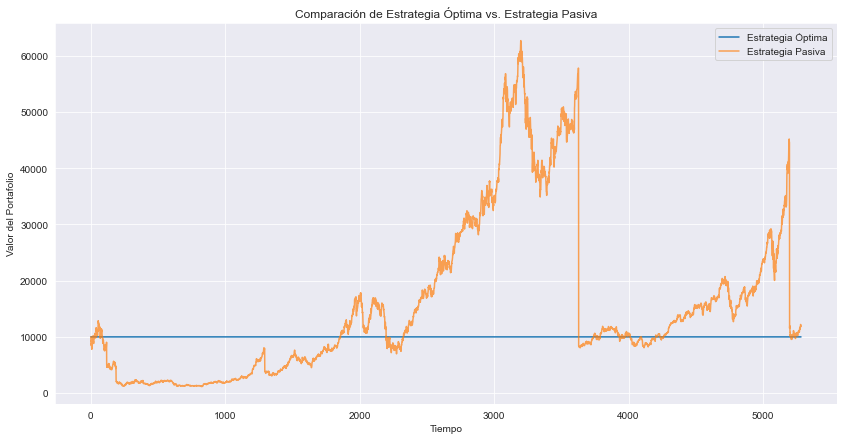

In [19]:
# Visualiza los resultados de la estrategia óptima y compáralos con la estrategia pasiva
plt.figure(figsize=(14, 7))
plt.plot(backtest_results['portfolio_value_over_time'], label='Estrategia Óptima')
plt.plot(data_1d['Close'] / data_1d['Close'].iloc[0] * 10000, label='Estrategia Pasiva', alpha=0.7)
plt.title('Comparación de Estrategia Óptima vs. Estrategia Pasiva')
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend()
plt.show()


In [20]:
# Ejemplo de visualización: gráfico de velas con señales de compra/venta
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_1d['Date'],
                open=data_1d['Open'],
                high=data_1d['High'],
                low=data_1d['Low'],
                close=data_1d['Close'])])


fig.show()


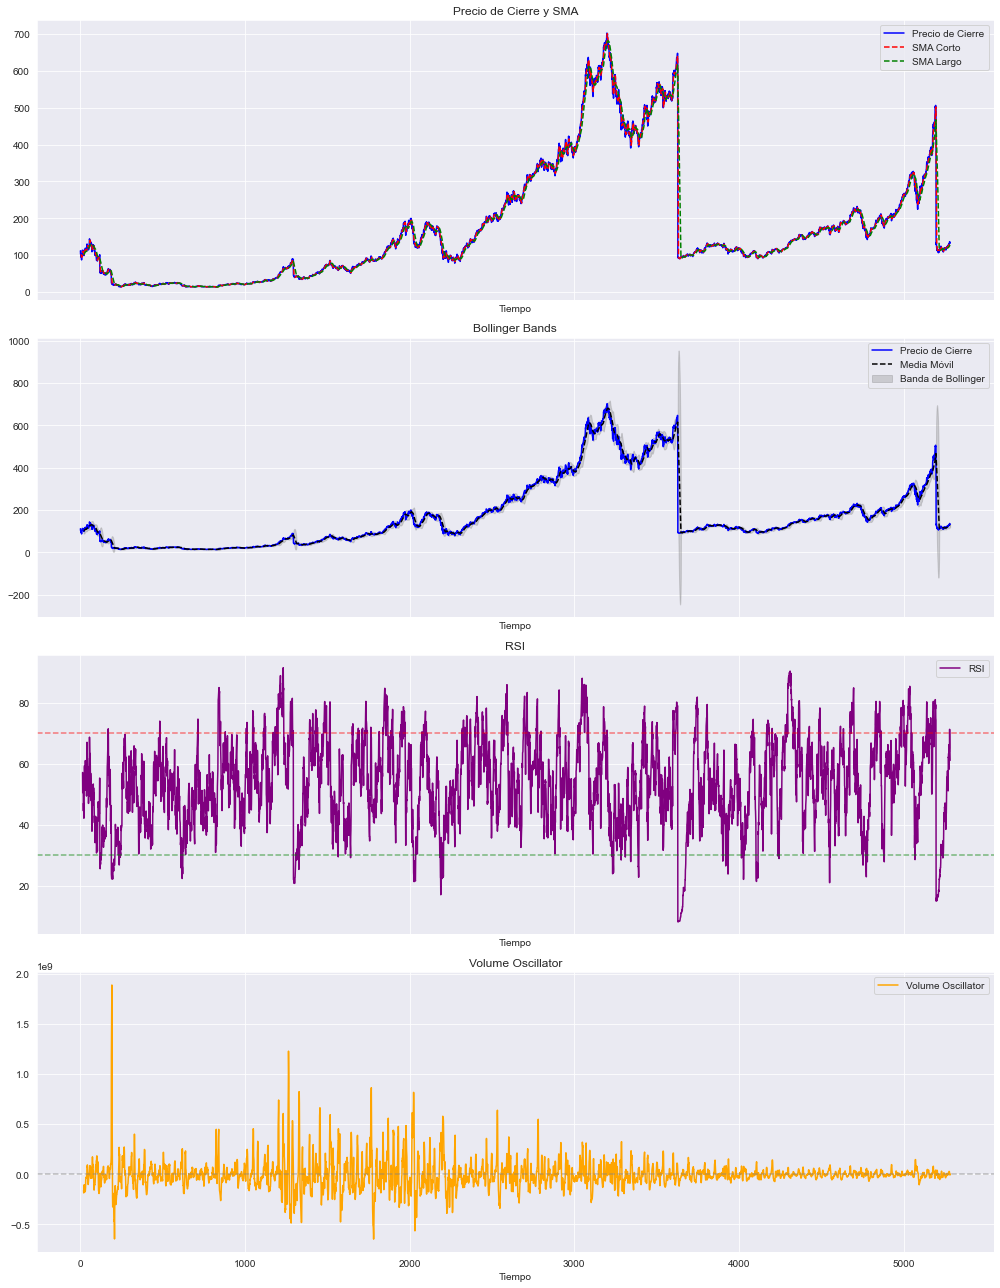

In [22]:
# Cálculos de indicadores
data_1d['RSI'] = calculate_rsi(data_1d, window=14)
data_1d['SMA_short'] = calculate_sma(data_1d['Close'], window=5)
data_1d['SMA_long'] = calculate_sma(data_1d['Close'], window=20)
data_1d['BB_mavg'], data_1d['BB_hband'], data_1d['BB_lband'] = calculate_bollinger(data_1d, 20, 2)
data_1d['Volume_Osc'] = calculate_volume_oscillator(data_1d, 5, 20)

# Configuración de la figura para múltiples subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

# Precio de cierre y SMA
axs[0].plot(data_1d['Close'], label='Precio de Cierre', color='blue')
axs[0].plot(data_1d['SMA_short'], label='SMA Corto', color='red', linestyle='--')
axs[0].plot(data_1d['SMA_long'], label='SMA Largo', color='green', linestyle='--')
axs[0].set_title('Precio de Cierre y SMA')
axs[0].legend()

# Bollinger Bands
axs[1].plot(data_1d['Close'], label='Precio de Cierre', color='blue')
axs[1].plot(data_1d['BB_mavg'], label='Media Móvil', color='black', linestyle='--')
axs[1].fill_between(data_1d.index, data_1d['BB_hband'], data_1d['BB_lband'], color='gray', alpha=0.3, label='Banda de Bollinger')
axs[1].set_title('Bollinger Bands')
axs[1].legend()

# RSI
axs[2].plot(data_1d['RSI'], label='RSI', color='purple')
axs[2].axhline(70, linestyle='--', color='red', alpha=0.5)
axs[2].axhline(30, linestyle='--', color='green', alpha=0.5)
axs[2].set_title('RSI')
axs[2].legend()

# Volume Oscillator
axs[3].plot(data_1d['Volume_Osc'], label='Volume Oscillator', color='orange')
axs[3].axhline(0, linestyle='--', color='gray', alpha=0.5)
axs[3].set_title('Volume Oscillator')
axs[3].legend()

# Configurar el eje X compartido
for ax in axs:
    ax.set_xlabel('Tiempo')

plt.tight_layout()
plt.show()
